Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.6** | **Face_Detection_using_OpenCV.ipynb**
**Name** | Quibral, Juliann Vincent
**Section** | CPE32S3
**Date Performed**: | 2/21/2025
**Date Submitted**: | 2/21/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

In [ ]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2
from google.colab.patches import cv2_imshow

picPath = '/content/breaking_bad.jpg'
haarPath = '/content/haarcascade_frontalface_default.xml'

def faceDetect(picPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

  cv2_imshow(img)

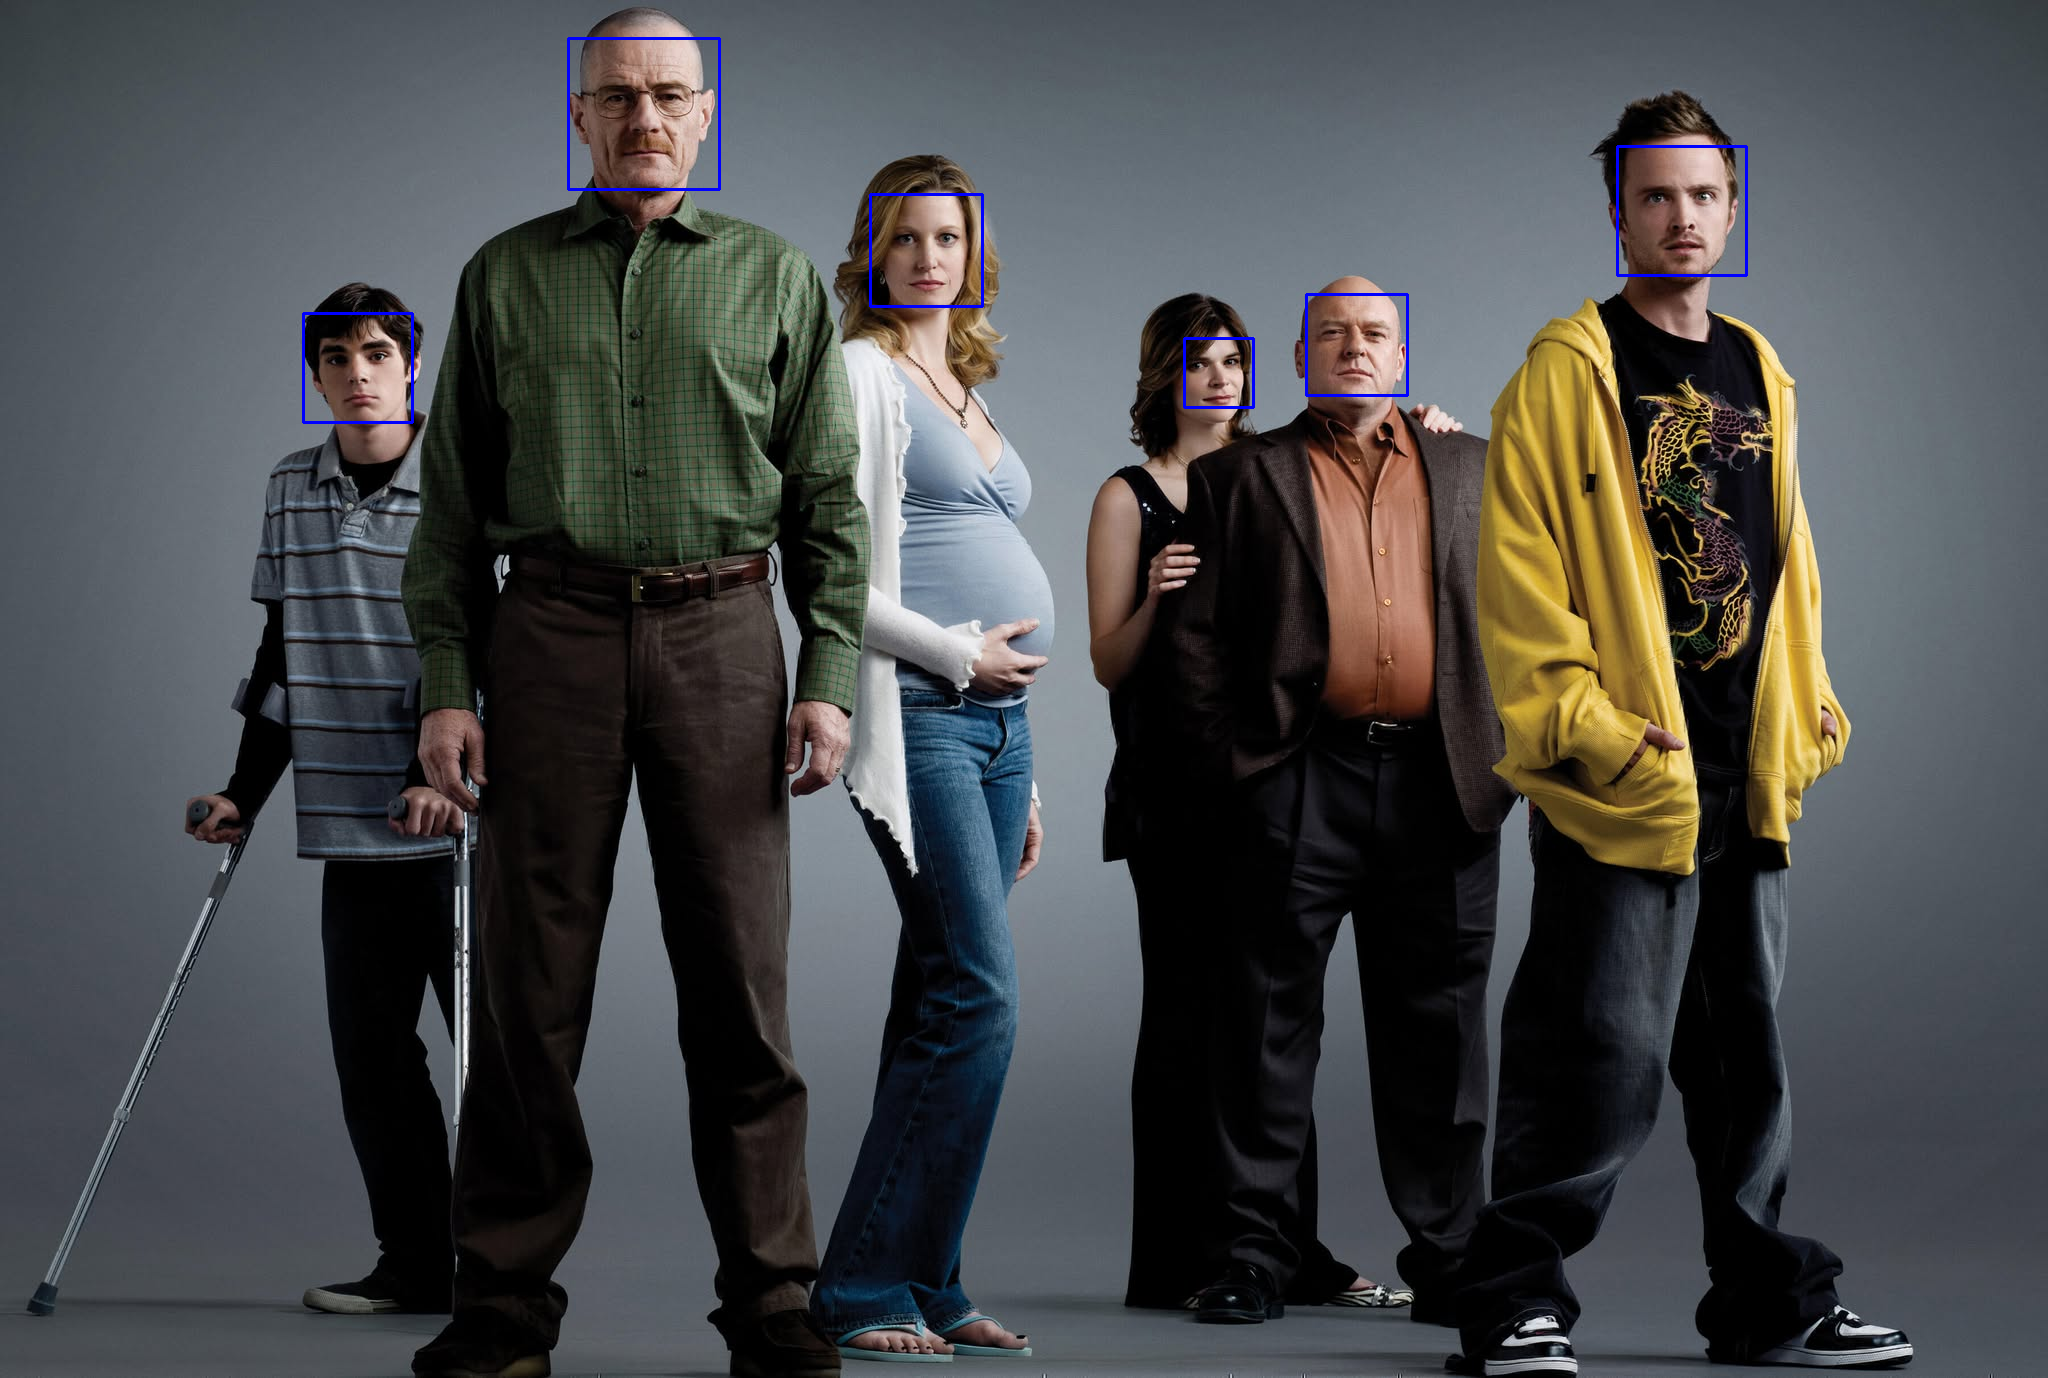

In [ ]:
faceDetect(picPath)

**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?
- Provide an analysis of the parameters of the `detectMultiScale` method.
- Change the color of the border of the detected faces to red.
- Are you able to make the borders thicker? Demonstrate.

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [ ]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [ ]:
def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [ ]:
  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [ ]:
  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [ ]:
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [ ]:

    cv2.imshow("camera", frame)
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
detect()

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

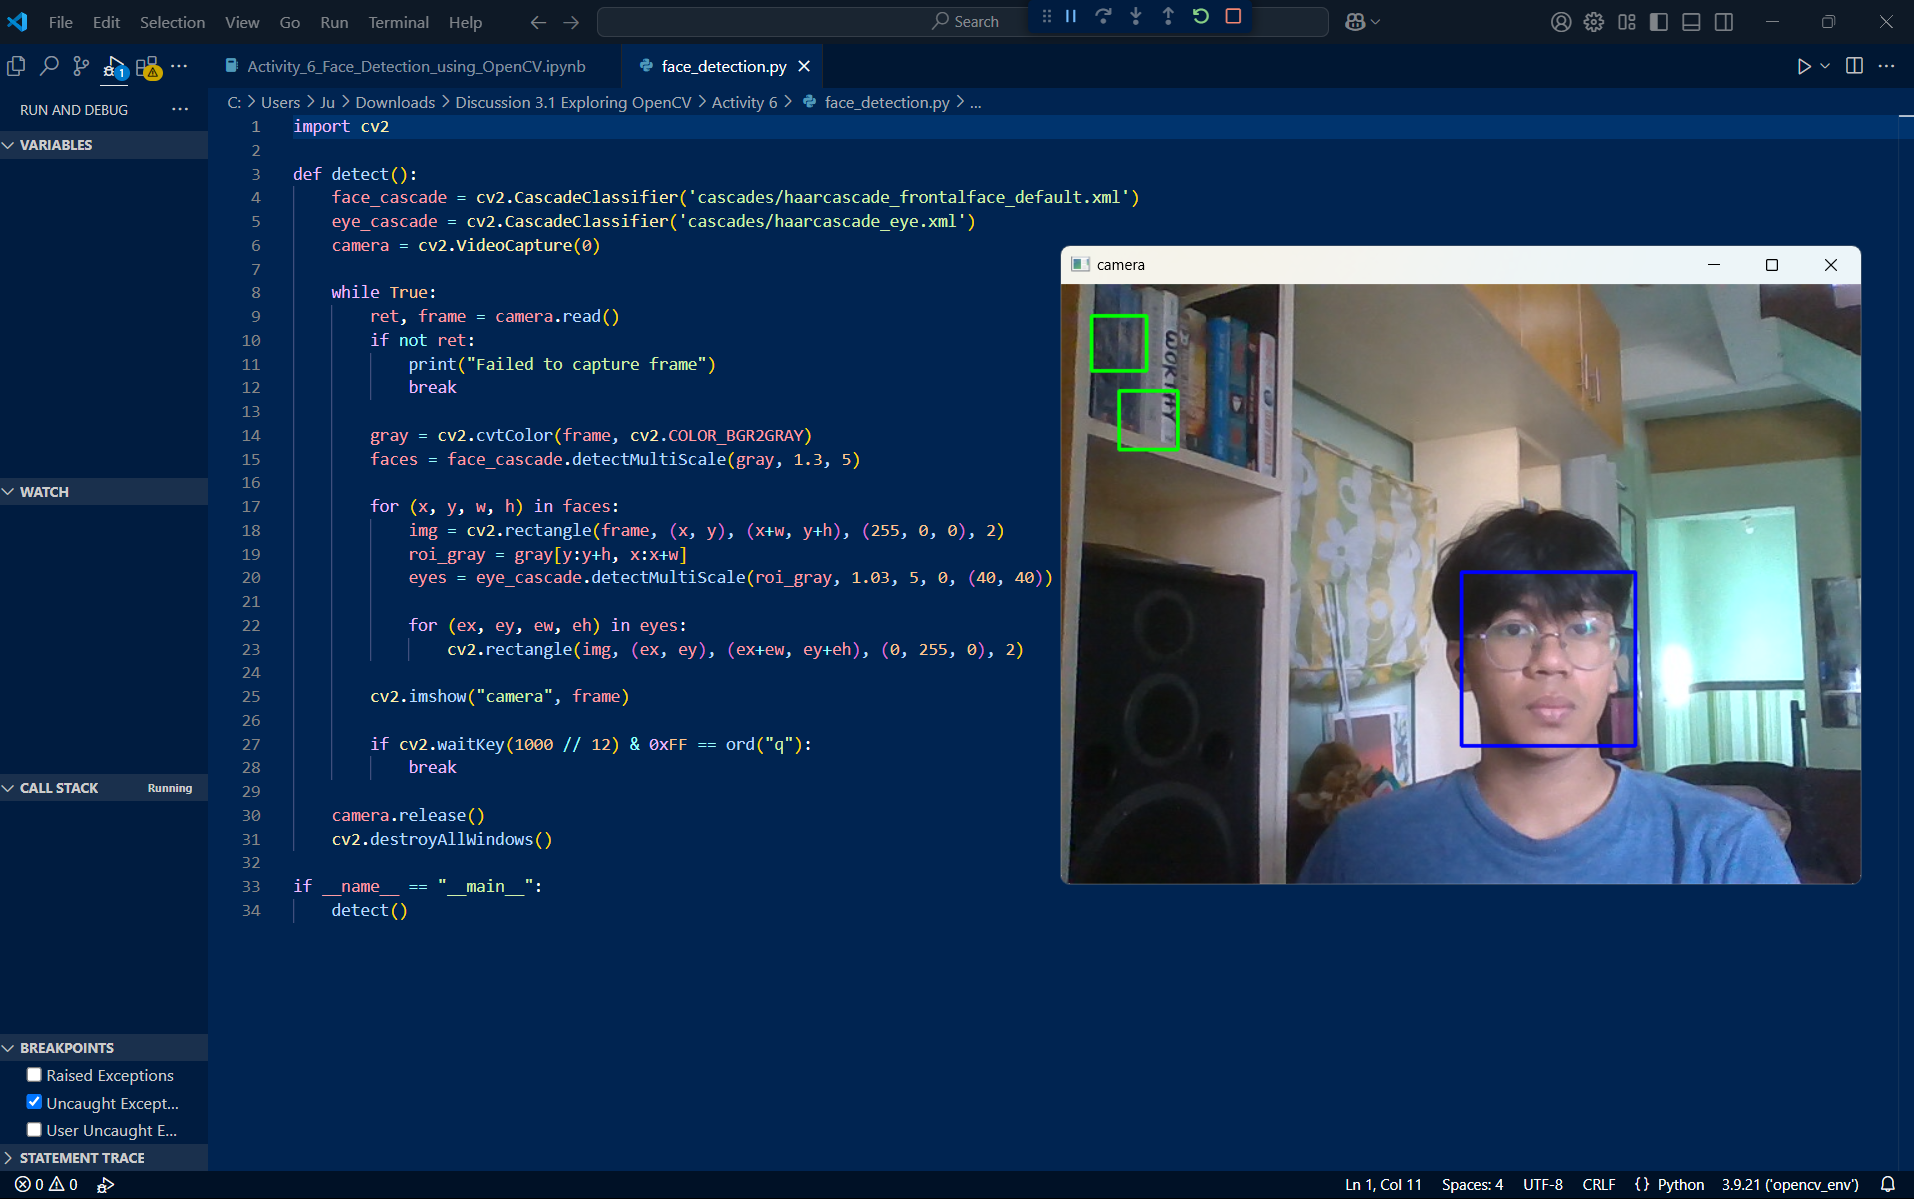

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

In [ ]:
import cv2

def detect():
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    camera = cv2.VideoCapture(0)

    while True:
        ret, frame = camera.read()
        if not ret:
            print("Failed to capture frame")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        smiling_detected = False

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame[y:y + h, x:x + w]

            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 22)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

            smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
            if len(smiles) > 0:
                smiling_detected = True

            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 255), 2)

        if smiling_detected:
            cv2.putText(frame, "Smiling", (frame.shape[1] - 150, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        cv2.imshow("Smile Bro", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()

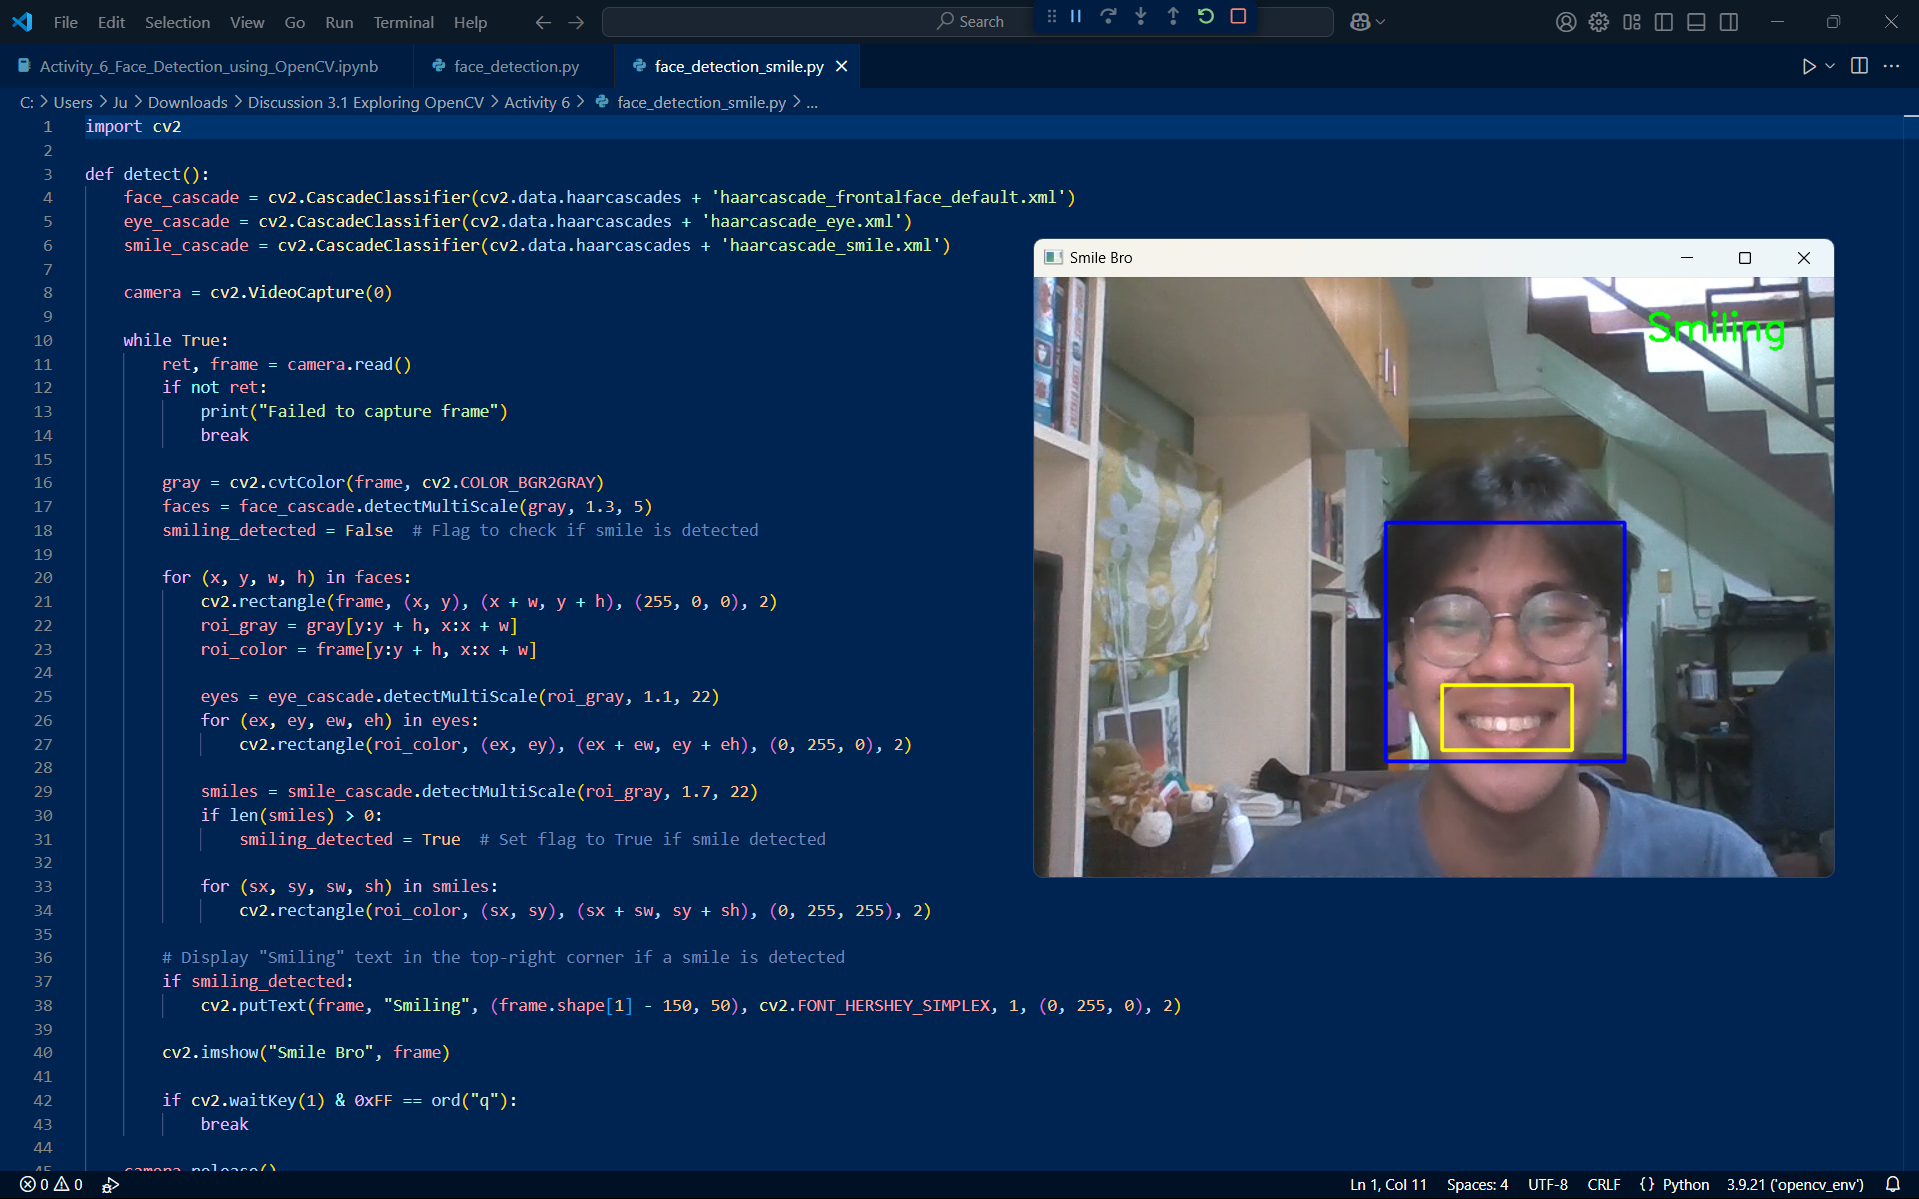

## 5. Summary, Conclusions and Lessons Learned

**Summary**

The goal of this exercise was to leverage OpenCV's Haar cascades to develop face detection.  I started by loading an image, turning it to grayscale, and then using the detectMultiScale method to find faces in still photos.  I then expanded this to include video streams, applying the same detecting procedure frame by frame.  I also added eye detection and then added grin detection after that.  When a grin was identified, the last step was to show "Smiling" on the screen.

**Conclusion**

Although the idea of face detection was simple, there were unforeseen difficulties in putting it into practice.  It required some effort to comprehend and properly adjust the detectMultiScale settings because even minor adjustments had an impact on detection accuracy.  It was necessary to handle regions of interest carefully while integrating several characteristics (faces, eyes, and grins) in order to prevent false positives.  I was able to develop a real-time face and smile identification system in spite of the challenges.

**Lesson learned/notes**

Since videos are a series of frames, face detection in photos and videos follows the same basic concepts.

 For the best detection accuracy, Haar cascades need to have their parameters adjusted.

 It becomes more complex to implement numerous feature detections (eyes, grins), necessitating careful region-of-interest management.

 It can be annoying to debug real-time detection, particularly if the video feed fluctuates or if the detection limits need to be changed.

 Notwithstanding the difficulties, the system's effective implementation strengthened my grasp of OpenCV and real-time computer vision applications.




<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*